In [1]:
pip install albumentations

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ------------------- ------------------ 41.0/81.7 kB 991.0 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/81.7 kB 991.0 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 409.6 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 415.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/67.4 kB ? eta -:--:--
     ---------------------------------------- 67.4/67.4 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/284.0 kB ? eta -:--:--
   -------- ------------------------------- 61.4/284.0 kB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/284.0 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 143.4/284.0 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 194.6/284.0 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 225.3/284.0 kB 1.1 MB/

In [7]:
# ! "C:\\Users\\STARLINECOMP\\anaconda3\\python.exe" -m pip install --upgrade typing_extensions pydantic albumentations

In [4]:
# import sys
# print(sys.executable)

C:\Users\STARLINECOMP\anaconda3\python.exe


In [9]:
# pip install --upgrade typing_extensions pydantic

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/204.1 MB 1.6 MB/s eta 0:02:08
   ---------------------------------------- 0.1/204.1 MB 1.6 MB/s eta 0:02:08
   ---------------------------------------- 0.1/204.1 MB 1.6 MB/s eta 0:02:08
   ---------------------------------------- 0.1/204.1 MB 476.3 kB/s eta 0:07:09
   ---------------------------------------- 0.1/204.1 MB 544.7 kB/s eta 0:06:15
   ---------------------------------------- 0.1/204.1 MB 566.5 kB/s eta 0:06:01
   ---------------------------------------- 0.2/204.1 MB 508.4 kB/s eta 0:06:42
   ---------------------------------------- 0.2/204.1 MB 535.8 kB/s eta 0:06:21
   ---------------------------------------- 0.2/204.1 MB 576.2 kB/s eta 0:05:54
   ---------------------------------------- 0.3/204.1 MB 630.9 kB/s eta 0:05:24
   ---------------------------------------- 0.3/204.1 MB 570.1 kB/s eta 0:05:58
   ---------------------------------------- 0.3/204.1 M

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# training CNN using pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
hd5_1 ="chunk1.hdf5"
csv_file_1 = "chunk1.csv"
hdf5_2 =  "chunk2.hdf5"
csv_file_2 = "chunk2.csv"
chunk_1 = pd.read_csv(csv_file_1, low_memory=False)
chunk_2 = pd.read_csv(csv_file_2, low_memory=False)
full_csv = pd.concat([chunk_1,chunk_2])

In [3]:
full_csv.head()

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,AE,113A,HH,32.768299,-113.766701,118.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 00:17:30,noise,113A.AE_20180115001730_NO
1,AE,113A,HH,32.768299,-113.766701,118.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 00:33:36,noise,113A.AE_20180115003336_NO
2,AE,113A,HH,32.768299,-113.766701,118.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 02:01:06,noise,113A.AE_20180115020106_NO
3,AE,113A,HH,32.768299,-113.766701,118.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 02:29:06,noise,113A.AE_20180115022906_NO
4,AE,113A,HH,32.768299,-113.766701,118.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 03:51:00,noise,113A.AE_20180115035100_NO


In [4]:
print('Number of rows:', full_csv.shape[0])
print('Number of columns:', full_csv.shape[1])

#Check for missing values
print('Number of missing values:', full_csv.isnull().sum().sum())

Number of rows: 435426
Number of columns: 35
Number of missing values: 7120173


In [5]:
missing_values = full_csv.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / full_csv.shape[0]) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df)

                                  Missing Values  Percentage
source_mechanism_strike_dip_rake          434273   99.735202
source_origin_uncertainty_sec             418172   96.037444
source_magnitude_author                   370717   85.138921
source_depth_uncertainty_km               364357   83.678283
source_horizontal_uncertainty_km          355215   81.578730
source_gap_deg                            352716   81.004809
source_error_sec                          351500   80.725542
p_weight                                  235489   54.082439
s_weight                                  235483   54.081061
source_depth_km                           235435   54.070037
source_longitude                          235426   54.067970
source_magnitude_type                     235426   54.067970
source_magnitude                          235426   54.067970
back_azimuth_deg                          235426   54.067970
source_latitude                           235426   54.067970
source_origin_time      

In [6]:
num_cols = ['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m', 'p_arrival_sample',
            'p_weight', 'p_travel_sec', 's_arrival_sample', 's_weight', 'source_origin_uncertainty_sec',
            'source_latitude', 'source_longitude', 'source_error_sec', 'source_gap_deg',
            'source_horizontal_uncertainty_km', 'source_depth_km', 'source_depth_uncertainty_km',
            'source_magnitude', 'source_distance_deg', 'source_distance_km', 'back_azimuth_deg',
            'snr_db', 'coda_end_sample']

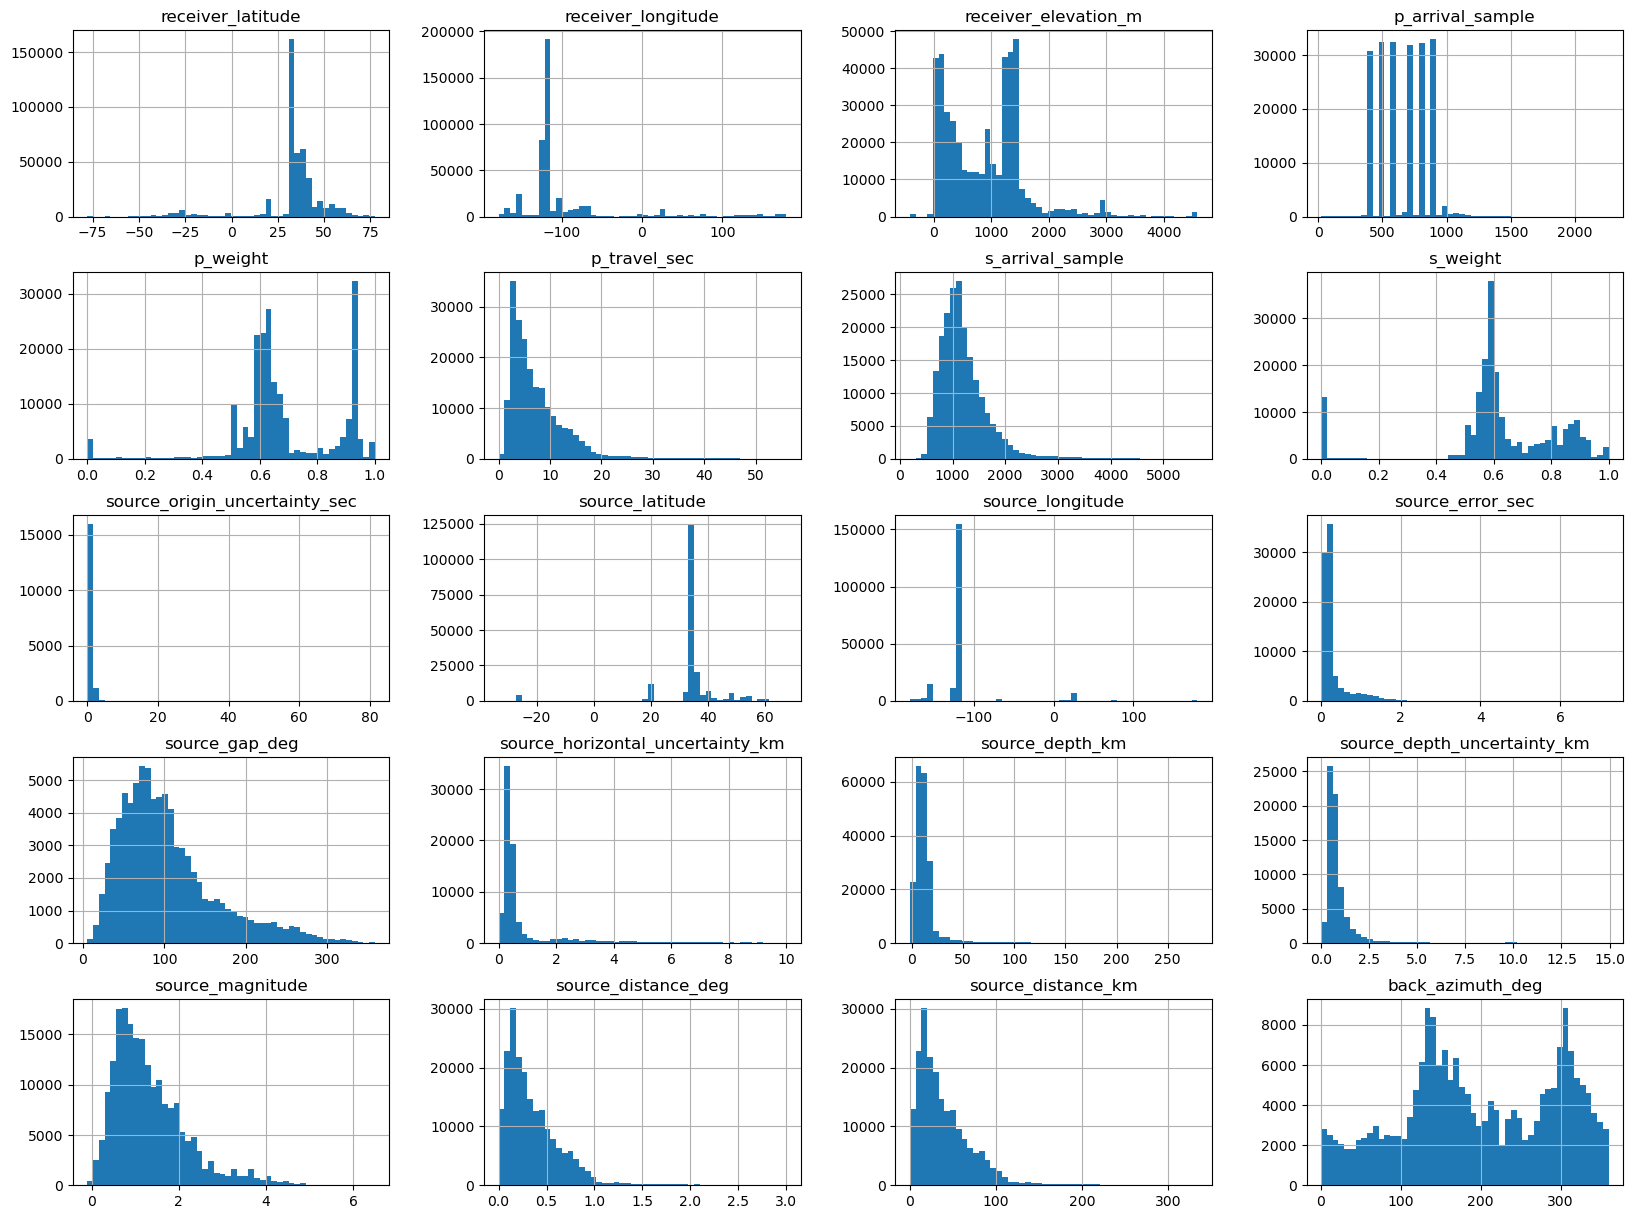

<Figure size 640x480 with 0 Axes>

In [7]:
full_csv[num_cols].hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig('histogram' +'.png')

In [8]:
for col in num_cols:
    if not pd.api.types.is_numeric_dtype(full_csv[col]):
        print(f"⚠️ Column '{col}' contains non-numeric values!")
        print(full_csv[col].unique()[:5])  # Show a sample of unique values

⚠️ Column 'snr_db' contains non-numeric values!
[nan '[56.79999924 55.40000153 47.40000153]'
 '[65.         65.5        61.40000153]'
 '[37.20000076 42.         38.59999847]'
 '[54.09999847 54.90000153 45.5       ]']
⚠️ Column 'coda_end_sample' contains non-numeric values!
[nan '[[2896.]]' '[[5508.]]' '[[3114.]]' '[[3152.]]']


In [9]:
for col in num_cols:
    full_csv[col] = pd.to_numeric(full_csv[col], errors='coerce')  # Convert to numeric, setting errors to NaN

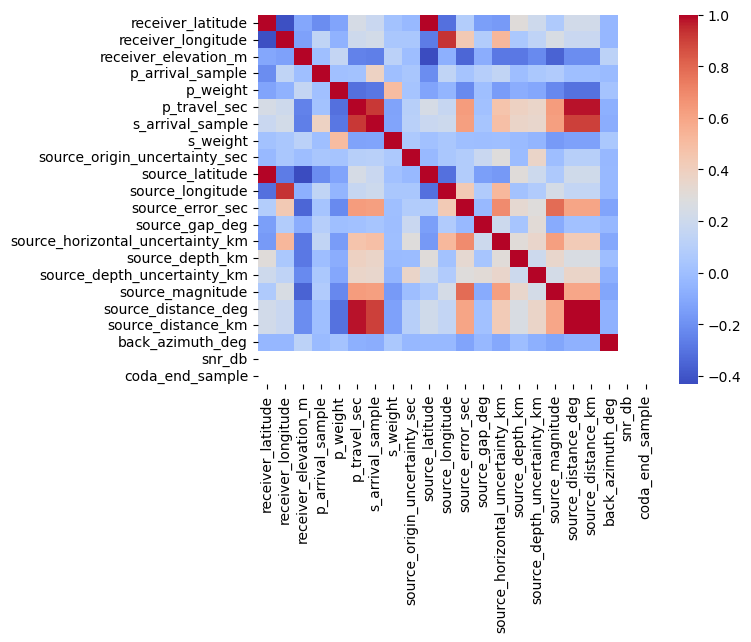

<Figure size 640x480 with 0 Axes>

In [10]:
import seaborn as sns
# Check the correlation between numerical columns
corr_matrix = full_csv[num_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()
plt.savefig('co_rel' + '.png')

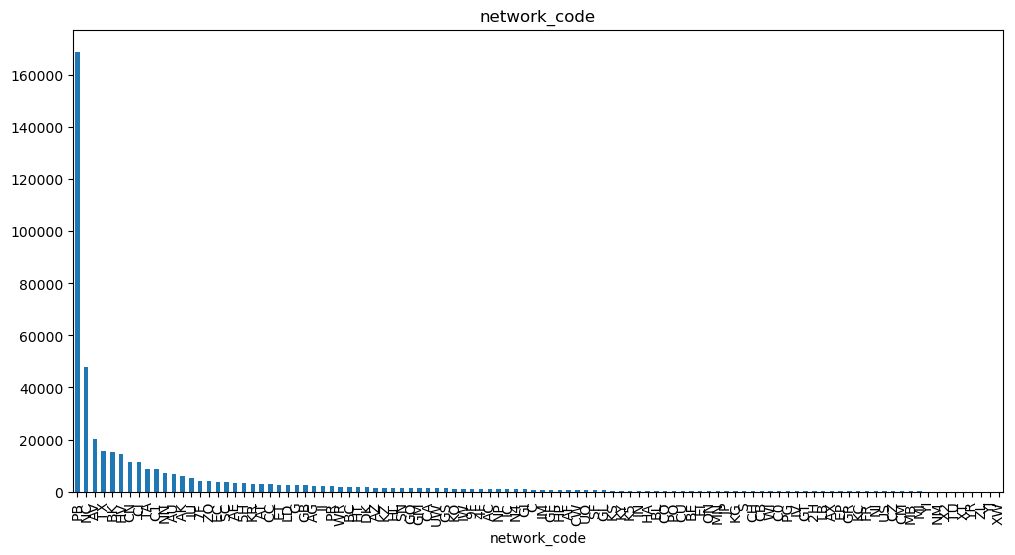

<Figure size 640x480 with 0 Axes>

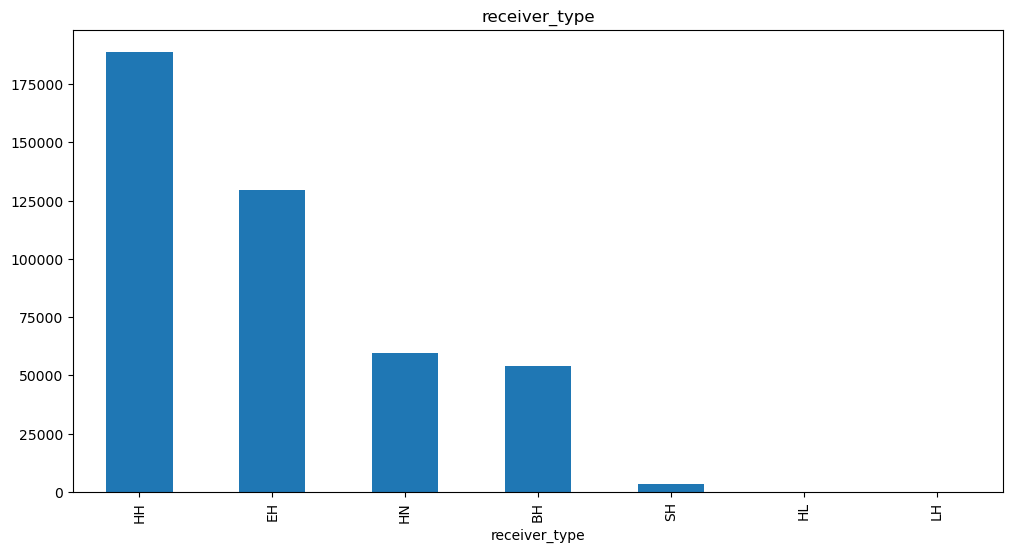

<Figure size 640x480 with 0 Axes>

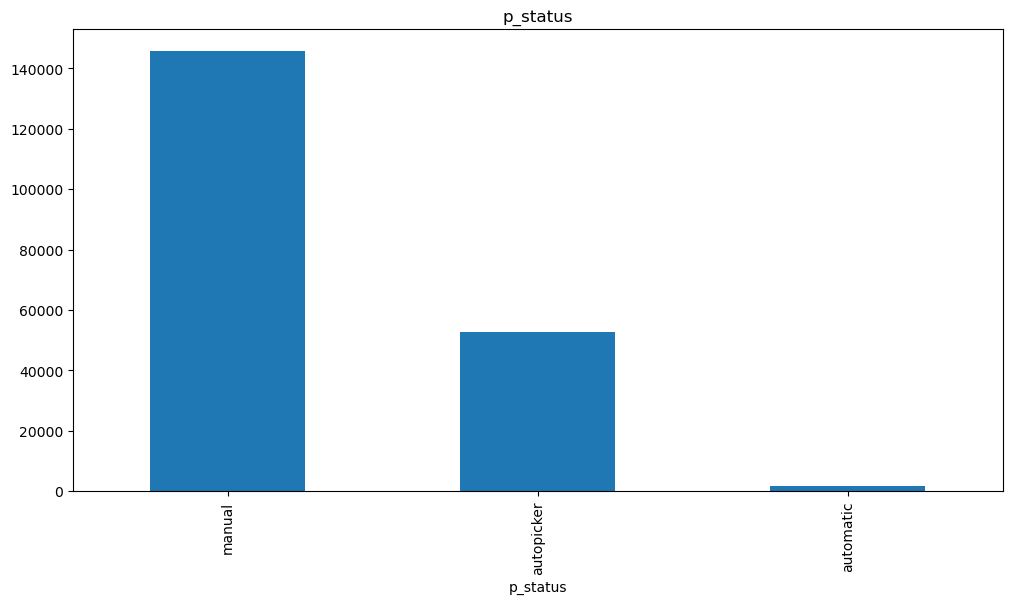

<Figure size 640x480 with 0 Axes>

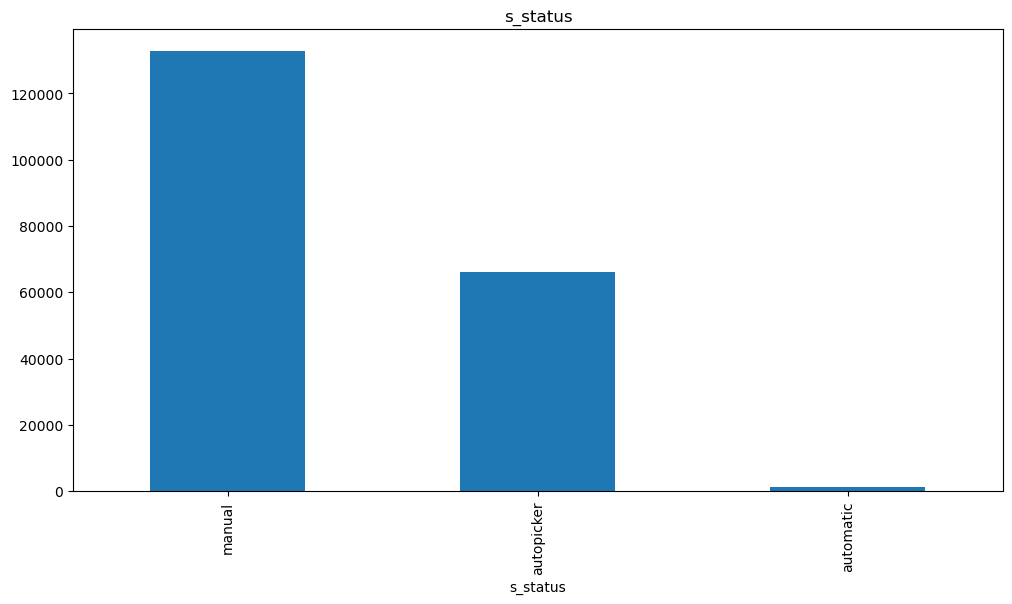

<Figure size 640x480 with 0 Axes>

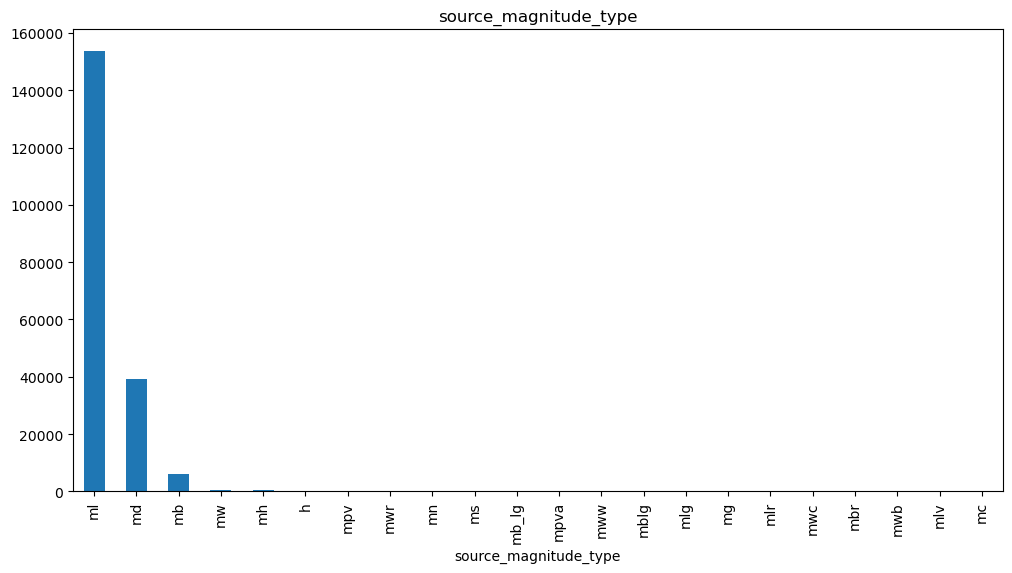

<Figure size 640x480 with 0 Axes>

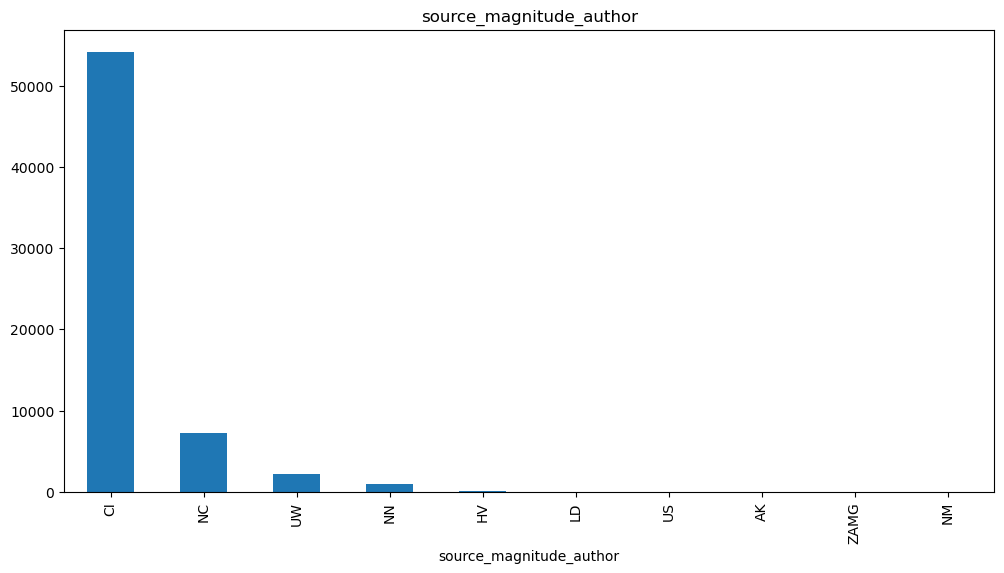

<Figure size 640x480 with 0 Axes>

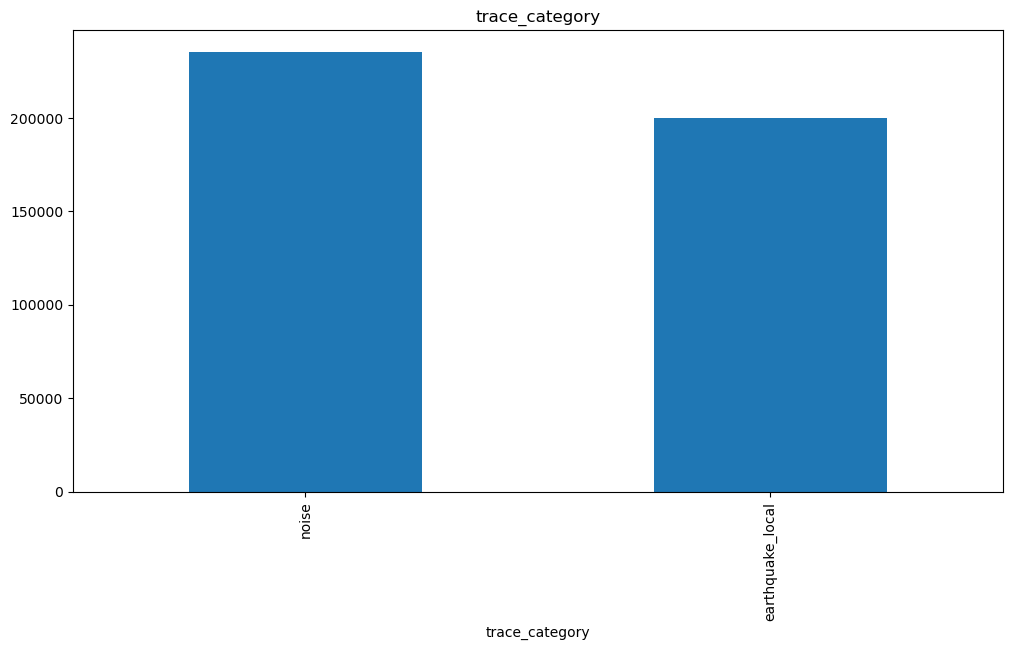

<Figure size 640x480 with 0 Axes>

In [11]:
# Check the distribution of categorical columns
cat_cols = ['network_code', 'receiver_type', 'p_status', 's_status',
            'source_magnitude_type', 'source_magnitude_author', 'trace_category']
for col in cat_cols:
    plt.figure(figsize=(12,6))
    full_csv[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()
    plt.savefig(col + '.png')

In [12]:
df = full_csv[full_csv["trace_category"] != "noise"]

In [13]:
print(full_csv[num_cols].isnull().sum())  # Check remaining NaN values

# Option 1: Fill NaNs with column mean
# full_csv[num_cols] = full_csv[num_cols].fillna(full_csv[num_cols].mean())

# Option 2: Drop rows with NaNs (if you prefer)
# df = full_csv.dropna(subset=num_cols)


receiver_latitude                        0
receiver_longitude                       0
receiver_elevation_m                     0
p_arrival_sample                    235426
p_weight                            235489
p_travel_sec                        235426
s_arrival_sample                    235426
s_weight                            235483
source_origin_uncertainty_sec       418172
source_latitude                     235426
source_longitude                    235426
source_error_sec                    351500
source_gap_deg                      352716
source_horizontal_uncertainty_km    355215
source_depth_km                     235435
source_depth_uncertainty_km         364357
source_magnitude                    235426
source_distance_deg                 235426
source_distance_km                  235426
back_azimuth_deg                    235426
snr_db                              435426
coda_end_sample                     435426
dtype: int64


In [14]:
# Print the cleaned dataset
print('Cleaned dataset:')
df.head()
print(f"Shape: {df.shape}")

Cleaned dataset:
Shape: (200000, 35)


In [25]:
pip install keras scikeras

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import cv2

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from datetime import datetime
from joblib import Parallel,delayed

from scipy import signal
from scipy.signal import resample,hilbert
from scikeras.wrappers import KerasClassifier


In [16]:
def waveform_spectrogram_plot(signal_path,signal_index,signal_list):
    dtfl = h5py.File(signal_path, 'r') # find the signal file
    dataset = dtfl.get('data/'+str(signal_list[signal_index])) # fetch one signal from the file
    # waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel
    data = np.array(dataset)

    # plot
    fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(9,7))
    ax1.plot(np.linspace(0,60,6000),data[:,2],color='k',linewidth=1) # plot waveform
    ymin, ymax = ax1.get_ylim()
    ax1.vlines(dataset.attrs['p_arrival_sample']/100,ymin,ymax,color='b',linewidth=1.5, label='P-arrival') # plot p-wave arrival time
    ax1.vlines(dataset.attrs['s_arrival_sample']/100, ymin, ymax, color='r', linewidth=1.5, label='S-arrival') # plot s-wave arrival time
    ax1.vlines(dataset.attrs['coda_end_sample']/100, ymin, ymax, color='cyan', linewidth=1.5, label='Coda end')
    ax1.set_xlim([0,60])
    ax1.legend(loc='lower right',fontsize=10)
    ax1.set_ylabel('Amplitude (counts)')
    ax1.set_xlabel('Time (s)')
    im = ax2.specgram(data[:,2],Fs=100,NFFT=256,cmap='jet',vmin=-10,vmax=25); # plot spectrogram
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_xlabel('Time (s)')
    ax3.psd(data[:,2],256,100,color='cornflowerblue') # plot power spectral density
    ax3.set_xlim([0,50])
    plt.savefig('waveform_spectrogram_plot.png',dpi=500)
    plt.tight_layout()
    plt.show()

    print('The p-wave for this waveform was picked by: ' + dataset.attrs['p_status'])
    print('The s-wave for this waveform was picked by: ' + dataset.attrs['s_status'])

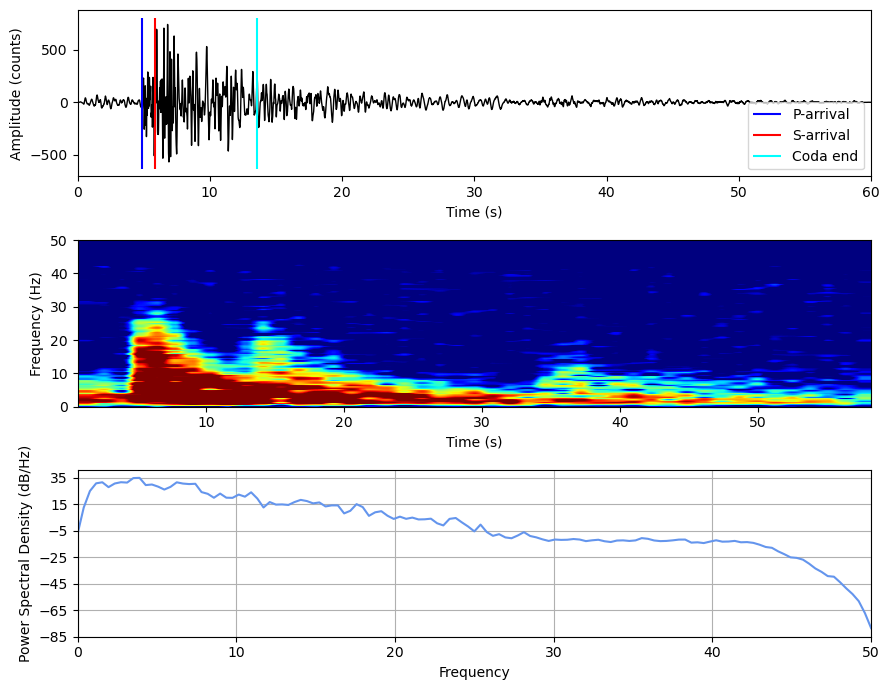

The p-wave for this waveform was picked by: autopicker
The s-wave for this waveform was picked by: autopicker


In [17]:
file_name = 'chunk2.hdf5'
waveform_spectrogram_plot(file_name,12000,df['trace_name'].to_list())

In [33]:
# import h5py
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import pandas as pd

# # Function to make images
# def make_images(i, traces, path, img_save_path, max_images=10000):
#     try:
#         # Ensure trace_name is a string
#         trace_name = str(traces[i])
#         print(f"Processing trace: {trace_name}")

#         # Open HDF5 file and access dataset
#         dtfl = h5py.File(path, 'r')
#         dataset = dtfl.get(f'/data/{trace_name}')
        
#         # Check if the dataset exists
#         if dataset is None:
#             print(f"Dataset for {trace_name} not found.")
#             return 0

#         # Retrieve waveform data
#         data = np.array(dataset)

#         # Create and save waveform image
#         fig, ax = plt.subplots(figsize=(3, 2))
#         ax.plot(np.linspace(0, 60, 6000), data[:, 2], color='k', linewidth=1)
#         ax.set_xlim([0, 60])
#         ax.axis('off')
#         plt.gca().set_axis_off()
#         plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
#         plt.margins(0, 0)
#         plt.savefig(os.path.join(img_save_path, f'{trace_name}_waveform.png'), bbox_inches='tight', dpi=50)
#         size = os.path.getsize(os.path.join(img_save_path, f'{trace_name}_waveform.png'))
#         plt.close()

#         # Create and save spectrogram image
#         fig, ax = plt.subplots(figsize=(3, 2))
#         ax.specgram(data[:, 2], Fs=100, NFFT=256, cmap='gray', vmin=-10, vmax=25)
#         ax.set_xlim([0, 60])
#         ax.axis('off')
#         plt.gca().set_axis_off()
#         plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
#         plt.margins(0, 0)
#         plt.savefig(os.path.join(img_save_path, f'{trace_name}_spectrogram.png'), bbox_inches='tight', transparent=True, pad_inches=0, dpi=50)
#         size += os.path.getsize(os.path.join(img_save_path, f'{trace_name}_spectrogram.png'))
#         plt.close()

#         return size

#     except Exception as e:
#         print(f"Error for trace {traces[i]}: {e}")
#         return 0

# # Function to process the dataset in chunks
# def process_data_in_chunks(csv_file_1, csv_file_2, hdf5_2, img_save_path, data_start=0, data_end=126500, data_interval=500, max_images=10000):
#     # Read CSV files into Pandas DataFrames
#     chunk_1 = pd.read_csv(csv_file_1)
#     chunk_2 = pd.read_csv(csv_file_2)

#     # Select chunk of data (adjust if needed)
#     chunk_name = chunk_2

#     # Generate list of trace names
#     eqlist = chunk_name['trace_name'].astype(str).to_list()

#     # Randomly sample the trace names (if desired)
#     eqlist = np.random.choice(eqlist, 126500, replace=False)

#     # Generate start and end indices for data slicing
#     starts = list(np.linspace(data_start, data_end - data_interval, int((data_end - data_start) / data_interval)))
#     ends = list(np.linspace(data_interval, data_end, int((data_end - data_start) / data_interval)))
    
#     total_size = 0
#     count = 0

#     # Iterate over the slices and create images
#     for n in range(0, len(starts)):
#         traces = eqlist[int(starts[n]):int(ends[n])]
        
#         for i in range(len(traces)):
#             # Stop if max_images is reached
#             if count >= max_images:
#                 print(f"Reached {max_images} images. Stopping.")
#                 return total_size
            
#             total_size += make_images(i, traces, hdf5_2, img_save_path, max_images)
#             count += 1
#             print(f"Processed {count} of {max_images} images.")

#     print(f"Total size of images: {total_size} bytes")
#     return total_size

# # Define file paths
# img_save_path = './images'  # Replace with actual path

# # Process data and create images, stop after 200 images
# process_data_in_chunks(csv_file_1, csv_file_2, hdf5_2, img_save_path, max_images=50000)


C:\Users\STARLINECOMP\AppData\Local\Temp\ipykernel_3496\3112458740.py:60: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk_2 = pd.read_csv(csv_file_2)


Processing trace: AHUD.HV_20180724185523_EV
Processed 1 of 10000 images.
Processing trace: B084.PB_20120527080416_EV
Processed 2 of 10000 images.
Processing trace: B082.PB_20110610205554_EV
Processed 3 of 10000 images.
Processing trace: B087.PB_20070719100100_EV
Processed 4 of 10000 images.
Processing trace: B084.PB_20130502172414_EV
Processed 5 of 10000 images.
Processing trace: B084.PB_20120421162538_EV
Processed 6 of 10000 images.
Processing trace: B046.PB_20140210191001_EV
Processed 7 of 10000 images.
Processing trace: B067.PB_20111121003824_EV
Processed 8 of 10000 images.
Processing trace: B082.PB_20111030170504_EV
Processed 9 of 10000 images.
Processing trace: B086.PB_20160411020206_EV
Processed 10 of 10000 images.
Processing trace: B086.PB_20070717020031_EV
Processed 11 of 10000 images.
Processing trace: B075.PB_20150822092252_EV
Processed 12 of 10000 images.
Processing trace: B084.PB_20140202044154_EV
Processed 13 of 10000 images.
Processing trace: A05A.TA_20081109091527_EV
Pro

162879429

In [48]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Function to make images
def make_images(i, traces, path, img_save_path, max_images=10000):
    try:
        # Ensure trace_name is a string
        trace_name = str(traces[i])
        print(f"Processing trace: {trace_name}")

        # Open HDF5 file and access dataset
        dtfl = h5py.File(path, 'r')
        dataset = dtfl.get(f'/data/{trace_name}')
        
        # Check if the dataset exists
        if dataset is None:
            print(f"Dataset for {trace_name} not found.")
            return 0

        # Retrieve waveform data
        data = np.array(dataset)

        # Create and save waveform image
        fig, ax = plt.subplots(figsize=(3, 2))
        ax.plot(np.linspace(0, 60, 6000), data[:, 2], color='k', linewidth=1)
        ax.set_xlim([0, 60])
        ax.axis('off')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.savefig(os.path.join(img_save_path, f'{trace_name}_waveform.png'), bbox_inches='tight', dpi=50)
        size = os.path.getsize(os.path.join(img_save_path, f'{trace_name}_waveform.png'))
        plt.close()

        # Create and save spectrogram image
        fig, ax = plt.subplots(figsize=(3, 2))
        ax.specgram(data[:, 2], Fs=100, NFFT=256, cmap='gray', vmin=-10, vmax=25)
        ax.set_xlim([0, 60])
        ax.axis('off')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.savefig(os.path.join(img_save_path, f'{trace_name}_spectrogram.png'), bbox_inches='tight', transparent=True, pad_inches=0, dpi=50)
        size += os.path.getsize(os.path.join(img_save_path, f'{trace_name}_spectrogram.png'))
        plt.close()

        return size

    except Exception as e:
        print(f"Error for trace {traces[i]}: {e}")
        return 0

# Function to process the dataset in chunks
def process_data_in_chunks(csv_file_1, csv_file_2, hdf5_2, img_save_path, data_start=0, data_end=126500, data_interval=500, max_images=10000, min_magnitude=3):
    # Read CSV files into Pandas DataFrames
    chunk_1 = pd.read_csv(csv_file_1)
    chunk_2 = pd.read_csv(csv_file_2)

    # Select chunk of data (adjust if needed)
    chunk_name = chunk_2

    # Filter traces based on source_magnitude > 3
    filtered_chunk = chunk_name[chunk_name['source_magnitude'] > min_magnitude]

    # Generate list of trace names
    eqlist = filtered_chunk['trace_name'].astype(str).to_list()

    # Check if the number of traces is smaller than the desired sample size
    sample_size = min(126500, len(eqlist))  # Use the smaller of the two values

    # Randomly sample trace names without replacement
    eqlist = np.random.choice(eqlist, sample_size, replace=False)

    # Generate start and end indices for data slicing
    starts = list(np.linspace(data_start, data_end - data_interval, int((data_end - data_start) / data_interval)))
    ends = list(np.linspace(data_interval, data_end, int((data_end - data_start) / data_interval)))
    
    total_size = 0
    count = 0

    # Iterate over the slices and create images
    for n in range(0, len(starts)):
        traces = eqlist[int(starts[n]):int(ends[n])]
        
        for i in range(len(traces)):
            # Stop if max_images is reached
            if count >= max_images:
                print(f"Reached {max_images} images. Stopping.")
                return total_size
            
            total_size += make_images(i, traces, hdf5_2, img_save_path, max_images)
            count += 1
            print(f"Processed {count} of {max_images} images.")

    print(f"Total size of images: {total_size} bytes")
    return total_size

# Define file paths
img_save_path = './images'  # Replace with actual path

# Process data and create images, stop after 50000 images
process_data_in_chunks(csv_file_1, csv_file_2, hdf5_2, img_save_path, max_images=5000, min_magnitude=3)


C:\Users\STARLINECOMP\AppData\Local\Temp\ipykernel_3496\3344848178.py:60: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk_2 = pd.read_csv(csv_file_2)


Processing trace: AQU.MN_20021031213329_EV
Processed 1 of 5000 images.
Processing trace: AUCH.AV_20150122095831_EV
Processed 2 of 5000 images.
Processing trace: B086.PB_20120826171610_EV
Processed 3 of 5000 images.
Processing trace: ALN.HT_20120914170040_EV
Processed 4 of 5000 images.
Processing trace: AQU.MN_20021031115652_EV
Processed 5 of 5000 images.
Processing trace: AOPR.PR_20181109155445_EV
Processed 6 of 5000 images.
Processing trace: AKMO.AV_20130228081027_EV
Processed 7 of 5000 images.
Processing trace: AGPR.PR_20141124034832_EV
Processed 8 of 5000 images.
Processing trace: ATKA.AK_20130902145433_EV
Processed 9 of 5000 images.
Processing trace: AUL.AV_20170724212651_EV
Processed 10 of 5000 images.
Processing trace: AKBB.AV_20160913092017_EV
Processed 11 of 5000 images.
Processing trace: ALN.HT_20140811222332_EV
Processed 12 of 5000 images.
Processing trace: ARK.KR_20120510172532_EV
Processed 13 of 5000 images.
Processing trace: B086.PB_20160214090110_EV
Processed 14 of 5000 i

67455897

In [49]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Function to associate images with CSV data
def load_images_with_labels(img_save_path, csv_file):
    # Read CSV to get metadata
    df = pd.read_csv(csv_file, low_memory=False)
    trace_names = df['trace_name'].astype(str).tolist()
    labels = df['source_magnitude'].tolist()  # assuming 'trace_category' is the label column
    
    images = []
    image_labels = []
    
    # Loop through trace names and load corresponding images
    # for trace_name, label in zip(trace_names, labels):
    #     img_path = os.path.join(img_save_path, f"{trace_name}_waveform.png")
    #     if os.path.exists(img_path):
    #         img = image.load_img(img_path, target_size=(224, 224))  # Resize for CNN
    #         img = image.img_to_array(img)
    #         images.append(img)
    #         image_labels.append(label)
    for trace_name, label in zip(trace_names, labels):
        img_path = os.path.join(img_save_path, f"{trace_name}_waveform.png")
        if os.path.exists(img_path):
            img = image.load_img(img_path, target_size=(224, 224))  
            img = image.img_to_array(img)
            images.append(img)
            image_labels.append(label)

    images = np.array(images)
    image_labels = np.array(image_labels)
    print(f"Loaded {len(images)} images and {len(image_labels)} labels.")  # Debugging print
    
    return images, image_labels

# Define paths
hd5_1 ="chunk1.hdf5"
csv_file_1 = "chunk1.csv"
hdf5_2 =  "chunk2.hdf5"
csv_file_2 = "chunk2.csv"

img_save_path = './images'  # Path where images are stored
csv_file = csv_file_2

# Load images with their corresponding labels from CSV
images, labels = load_images_with_labels(img_save_path, csv_file_2)

# labels = pd.to_numeric(df['source_magnitude'], errors='coerce')  # Convert to float, set non-numeric to NaN
# labels = labels.dropna().astype(np.float32)  # Remove NaN values

Loaded 5000 images and 5000 labels.


In [50]:
print(f"Loaded {len(images)} images and {len(labels)} labels.")  # Debugging print

Loaded 5000 images and 5000 labels.


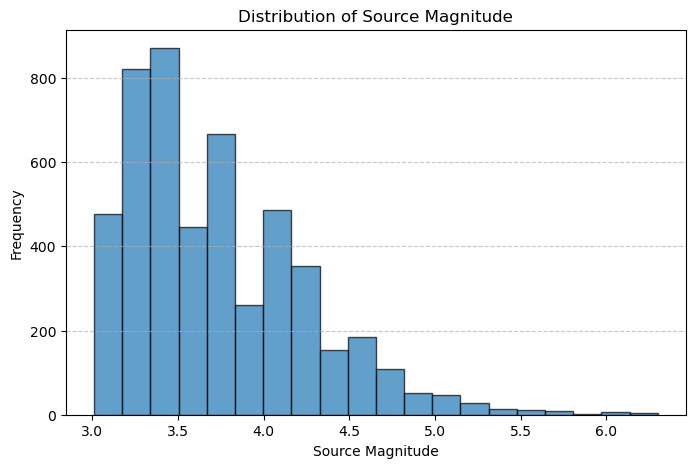

Min: 3.01, Max: 6.3
Mean: 3.730664, Median: 3.6
Unique values: [3.01 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14
 3.15 3.16 3.17 3.18 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.28 3.29
 3.3  3.31 3.32 3.33 3.34 3.35 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44
 3.45 3.46 3.47 3.48 3.49 3.5  3.51 3.54 3.55 3.56 3.57 3.58 3.59 3.6
 3.61 3.62 3.63 3.64 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.73 3.74
 3.75 3.76 3.77 3.78 3.79 3.8  3.81 3.82 3.83 3.84 3.86 3.87 3.89 3.9
 3.91 3.92 3.93 3.94 3.96 3.97 3.99 4.   4.01 4.02 4.03 4.04 4.05 4.06
 4.07 4.1  4.13 4.14 4.15 4.16 4.17 4.19 4.2  4.22 4.24 4.27 4.29 4.3
 4.31 4.32 4.33 4.35 4.39 4.4  4.43 4.47 4.48 4.5  4.52 4.55 4.56 4.58
 4.59 4.6  4.63 4.66 4.7  4.74 4.75 4.76 4.77 4.78 4.8  4.85 4.86 4.9
 4.92 4.93 4.99 5.   5.06 5.08 5.1  5.11 5.2  5.21 5.3  5.4  5.42 5.5
 5.56 5.6  5.7  5.8  5.81 5.9  6.   6.01 6.1  6.2  6.3 ]


In [51]:
import matplotlib.pyplot as plt

# Convert labels to float if not already
# labels = pd.to_numeric(labels, errors='coerce').dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(labels, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Source Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Source Magnitude')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print some statistics
print(f"Min: {labels.min()}, Max: {labels.max()}")
print(f"Mean: {labels.mean()}, Median: {np.median(labels)}")  # Use np.median()
print(f"Unique values: {np.unique(labels)}")


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

# Normalize image data (scaling pixel values between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [53]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your full training data and labels

# Split the data into train and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shape of the resulting data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training data shape: (3000, 224, 224, 3)
Validation data shape: (750, 224, 224, 3)
Training labels shape: (3000,)
Validation labels shape: (750,)


In [54]:
print(f"X_train dtype: {X_train.dtype}")
print(f"X_val dtype: {X_val.dtype}")
print(f"y_train dtype: {y_train.dtype}")
print(f"y_val dtype: {y_val.dtype}")


X_train dtype: float32
X_val dtype: float32
y_train dtype: float64
y_val dtype: float64


In [55]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define the CNN-BiLSTM model
def build_cnn_bilstm_model(input_shape):
    model = Sequential()
    
    # CNN layers
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.50))
    
    model.add(Flatten())  # Flatten CNN output
    
    # Reshape for LSTM layer input (adding a 'time' dimension)
    # Reshape into 3D: (batch_size, timesteps, features)
    # The number of timesteps and features is flexible. In this case, it's 1 timestep and flattened features.
    model.add(Reshape((1, -1)))  # The -1 will infer the number of features based on input shape
    
    # LSTM layer (optional: add more units or layers based on your need)
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    
    # Dense layers for regression
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  # Output a single scalar value for regression
    
    # Compile the model
    opt = Adam(learning_rate=1e-5)
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    
    return model

# Assuming X_train is your input data
input_shape = X_train.shape[1:]  # Shape of the images (e.g., 224, 224, 3) 
model = build_cnn_bilstm_model(input_shape)
model.summary()


C:\Users\STARLINECOMP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 802816)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 802816)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │   411,075,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,082,017 (1.53 GB)

 Trainable params: 411,082,017 (1.53 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - loss: 2.4844 - mae: 1.0658 - val_loss: 0.2825 - val_mae: 0.4027
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 0.2579 - mae: 0.3952 - val_loss: 0.2747 - val_mae: 0.4065
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 0.2617 - mae: 0.4051 - val_loss: 0.2734 - val_mae: 0.4060
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 0.2614 - mae: 0.4014 - val_loss: 0.2727 - val_mae: 0.4029
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - loss: 0.2618 - mae: 0.4020 - val_loss: 0.2708 - val_mae: 0.4028
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - loss: 0.2538 - mae: 0.3993 - val_loss: 0.2683 - val_mae: 0.4007
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - loss: 0.2460 - mae: 0.3924 - val_loss: 0.2651 - val_mae: 0.4007
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - loss: 0.2442 - mae: 0.3890 - val_loss: 0.2628 - val_mae: 0.4011
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - lo

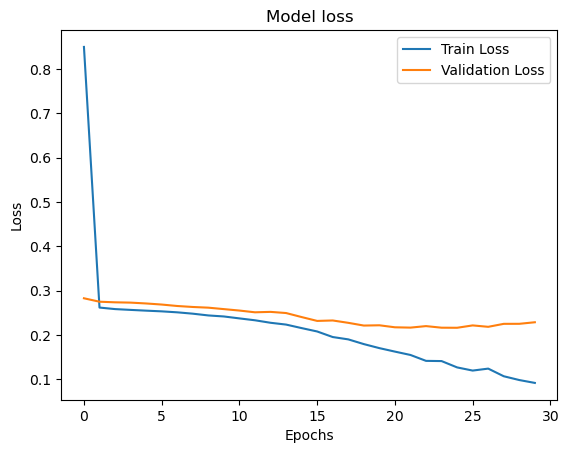

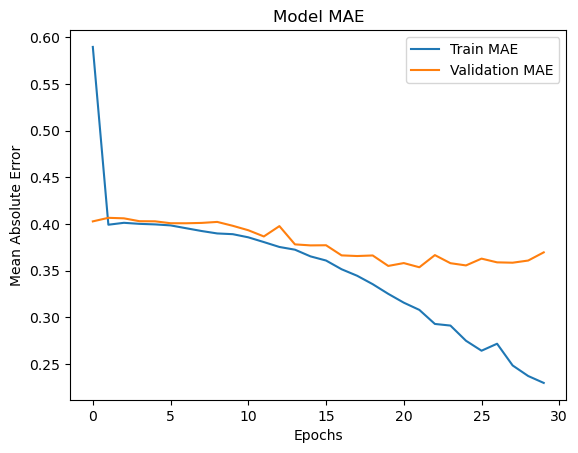

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using the training data and validate it on the validation set
history = model.fit(
    X_train,          # Training data
    y_train,          # Training labels
    epochs=100,        # Number of epochs
    batch_size=32,    # Batch size
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping],  # Early stopping callback
    verbose=1         # Print progress
)

# After training, evaluate on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Check the training history
print(history.history)

# Optionally, plot the training/validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optionally, plot the training/validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


In [58]:
# Save the entire model (architecture + weights + optimizer state)
model.save('waveform_cnn_model.keras')

In [59]:
import json

# Save history as JSON
with open('waveform_cnn_history.json', 'w') as f:
    json.dump(history.history, f)


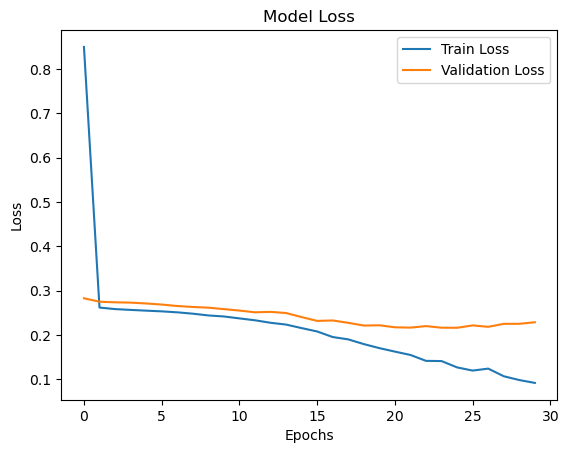

In [60]:
# Load history from JSON
with open('waveform_cnn_history.json', 'r') as f:
    loaded_history = json.load(f)

# Plot loaded history
plt.plot(loaded_history['loss'], label='Train Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
